In [1]:
%matplotlib inline
import numpy as np
import pylab as pl
from matplotlib import collections  as mc

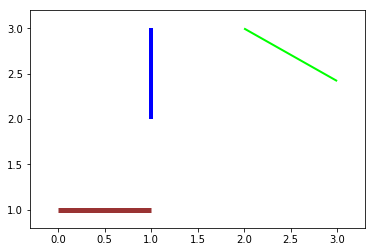

In [2]:
lines = [[(0, 1), (1, 1)], [(2, 3), (3, 2.42)], [(1, 2), (1, 3)]]
c = np.array([(0.6, 0.2, 0.2, 1), (0, 1, 0, 1), (0, 0, 1, 1)])

lc = mc.LineCollection(lines, colors=c, linewidths=[5,2,4])
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)

In [3]:
def binary_tree(n,seed,changes):
    lines = []
    lines.append(seed)
    if n>1:
        new_seed1 = [(seed[0][0]+seed[1][0]*np.cos(seed[1][1]),seed[0][1]+seed[1][0]*np.sin(seed[1][1])),(seed[1][0]*changes[0],seed[1][1]+changes[1])]
        new_seed2 = [(seed[0][0]+seed[1][0]*np.cos(seed[1][1]),seed[0][1]+seed[1][0]*np.sin(seed[1][1])),(seed[1][0]*changes[0],seed[1][1]-changes[1])]
        lines.extend(binary_tree(n-1,new_seed1,changes))
        lines.extend(binary_tree(n-1,new_seed2,changes))
    return lines
def transform_tree_to_coord(tree_lines):
    tree_transf = [[(pt[0][0],pt[0][1]),(pt[0][0]+pt[1][0]*np.cos(pt[1][1]),pt[0][1]+pt[1][0]*np.sin(pt[1][1]))] for pt in tree_lines]
    return(tree_transf)

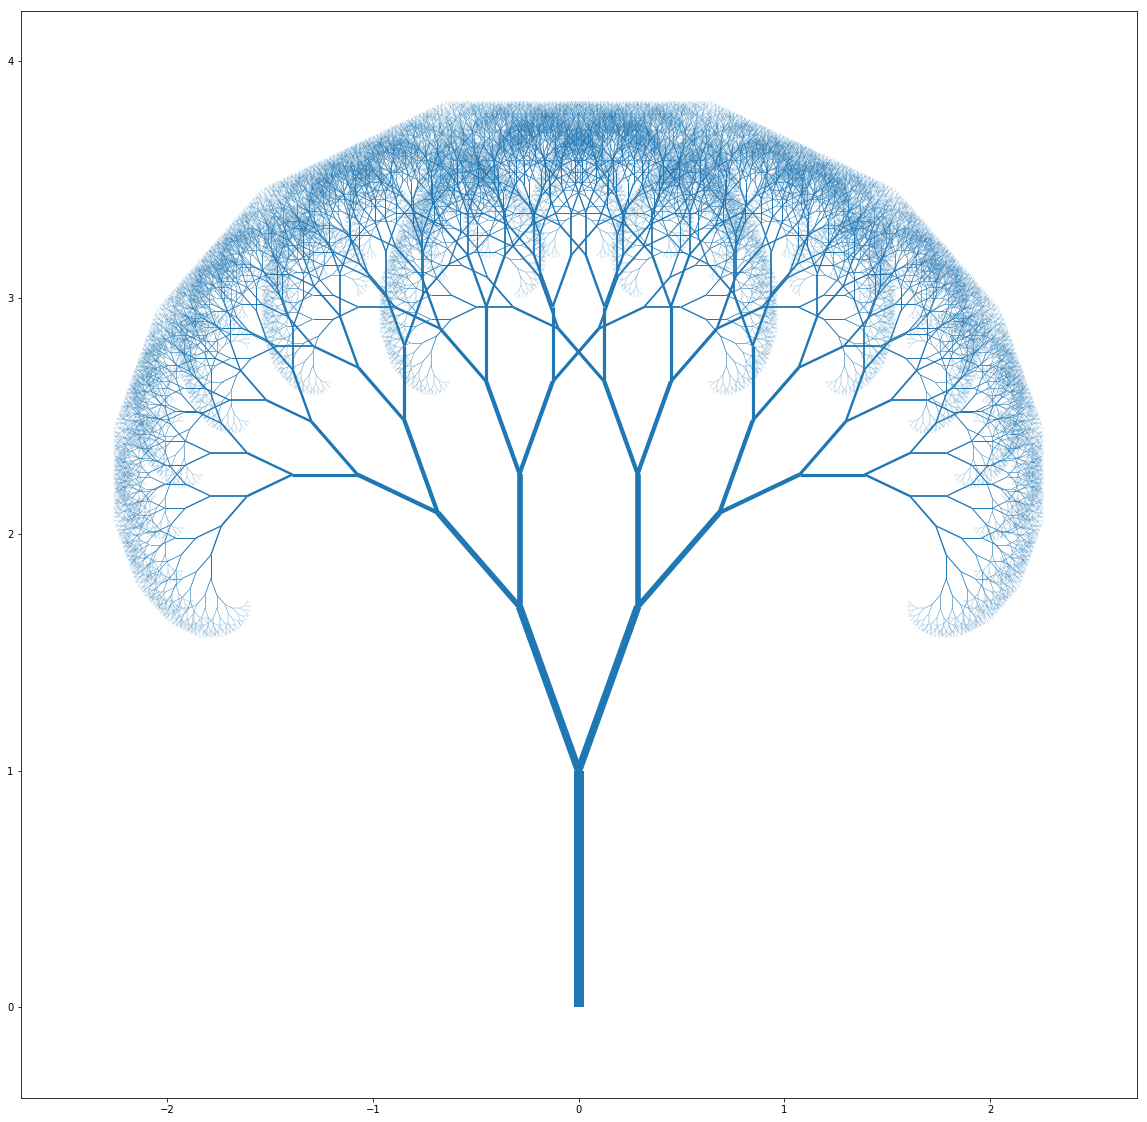

In [5]:
tree1_init = binary_tree(16, [(0,0),(1,np.pi/2)], [0.75,np.pi/8])
tree1 = transform_tree_to_coord(tree1_init)
widths1 = [10*pt[1][0] for pt in tree1_init]
lc = mc.LineCollection(tree1, linewidths=widths1)
fig, ax = pl.subplots(figsize=(20,20))
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)

In [6]:
a = []
for i in range(100):
    a.append(np.random.choice([1,2,3],p=[0.1,0.1,0.8]))

In [7]:
def random_tree(n,seed,changes,branch_dist):
    lines = []
    lines.append(seed)
    if n>1:
#         branches = np.random.choice([1,2,3,4],p=[0.5,0.3,0.15,0.05])
#         print(branch_dist)
        branches = np.random.choice(branch_dist[0],p=branch_dist[1])
        for b in range(branches):
            ang = np.random.uniform(low=-1,high=1)*changes[1]
            scale = np.random.uniform(low=0.8,high=1.2)*changes[0]
            new_seed = [(seed[0][0]+seed[1][0]*np.cos(seed[1][1]),seed[0][1]+seed[1][0]*np.sin(seed[1][1])),(seed[1][0]*scale,seed[1][1]+ang)]
            lines.extend(random_tree(n-1,new_seed,changes,branch_dist))
#         lines.extend(tree(n-1,new_seed2,changes))
    return lines

def random_tree_simple(n,seed,changes):
    lines = []
    lines.append(seed)
    if n>1:
        branches = np.random.choice([2,3,4],p=[0.8,0.15,0.05])
        for b in range(branches):
            ang = np.random.uniform(low=-1,high=1)*changes[1]
            scale = np.random.uniform(low=0.8,high=1.2)*changes[0]
            new_seed = [(seed[0][0]+seed[1][0]*np.cos(seed[1][1]),seed[0][1]+seed[1][0]*np.sin(seed[1][1])),(seed[1][0]*scale,seed[1][1]+ang)]
            lines.extend(random_tree(n-1,new_seed,changes))
#         lines.extend(tree(n-1,new_seed2,changes))
    return lines

In [8]:
def build_tree_random(n,seed,changes,branch_dist,width_mult):
    tree_init = random_tree(n,seed,changes,branch_dist)
    tree = transform_tree_to_coord(tree_init)
    widths = [width_mult*(pt[1][0]**1.3) for pt in tree_init]
    return (tree,widths)

In [254]:
# tree2_init = random_tree(13, [(0,0),(1,np.pi/2)], [0.7,np.pi/24])
# tree2 = transform_tree_to_coord(tree2_init)
# widths = [10*pt[1][0] for pt in tree2_init]
# c = []
# for i in range(len(tree2)):
#     c.append((0,0,1,1))

# ct1+=1
#----------grass like------------#
# descr = 'grass like'
# branch_dist1 = [[1,2,3,4],[0.35,0.45,0.15,0.05]]
# tree2,widths2 = build_tree_random(16, [(0,0),(0.6,np.pi/2)], [0.8,np.pi/32], branch_dist1, 15)
#--------------------------------#

#----------young tree------------#
# descr = 'young tree'
# branch_dist1 = [[1,2,3,4],[0.35,0.45,0.15,0.05]]
# tree2,widths2 = build_tree_random(16, [(0,0),(0.6,np.pi/2)], [0.8,np.pi/12], branch_dist1, 15)
#--------------------------------#

#----------dried up sapling------#
# descr = 'dried up sapling'
# branch_dist1 = [[1,2,3,4],[0.75,0.15,0.05,0.05]]
# tree2,widths2 = build_tree_random(16, [(0,0),(0.6,np.pi/2)], [0.8,np.pi/3], branch_dist1, 15)
#--------------------------------#

#-------thick tree, fully grown--#
# descr = 'thick tree'
# branch_dist1 = [[1,2,3,4],[0.45,0.35,0.15,0.05]]
# tree2,widths2 = build_tree_random(16, [(0,0),(0.6,np.pi/2)], [0.8,np.pi/3], branch_dist1, 35)
#--------------------------------#

#--------dense thick tree--------#
# high rendering time
# descr = 'dense thick tree'
# branch_dist1 = [[1,2,3,4],[0.25,0.25,0.25,0.25]]
# tree2,widths2 = build_tree_random(16, [(0,0),(0.6,np.pi/2)], [0.8,np.pi/4], branch_dist1, 35)
#--------------------------------#

#-------tuft---------------------#
# descr = 'grass tuft'
# branch_dist1 = [[1,2,3,4],[0.35,0.35,0.25,0.05]]
# tree2,widths2 = build_tree_random(16, [(0,0),(0.3,np.pi/2)], [0.88,np.pi/45], branch_dist1, 2)
#--------------------------------#

#-------thin tree----------------#
# descr='thin tree'
# branch_dist1 = [[1,2,3,4],[0.35,0.35,0.25,0.05]]
# tree2,widths2 = build_tree_random(16, [(0,0),(1,np.pi/2)], [0.7,np.pi/3], branch_dist1, 12)
#--------------------------------#

branch_dist1 = [[1,2,3,4,7],[0.65,0,0,0,0.35]]
tree2,widths2 = build_tree_random(16, [(0,0),(0.8,np.pi/2)], [0.8,np.pi/2.5], branch_dist1, 20)

lc = mc.LineCollection(tree2, colors=(0.6,0.2,0.3,1),linewidths=widths2)
fig, ax = pl.subplots(figsize=(8,8))
ax.set_xlim([-3, 3])
ax.set_ylim([0, 6])
ax.add_collection(lc)
# ax.autoscale()
ax.margins(0.1)
# pl.savefig("D:/Personal/Projects/Recursive structures/Images/Random Tree "+str(descr)+".png")
#colors: (0,0.7,0.3,1), (0,0.3,0.7,1),(0.3,0.3,0.7,1),(0,0.5,0.7,1),(0.6,0.1,0.2,1),(0.6,0.2,0.3,1)

MemoryError: 

In [28]:
def build_forest(num_trees,forest_width,color_map,n,seed,changes,branch_dist,width_mult):
    trees = []
    widths = []
    colors = []
    for t in range(num_trees):
        xshift_t = np.random.uniform(low=-1*forest_width,high=forest_width)
        lscale_t = np.random.uniform(low=0.1,high=1)
        
        seed_t = [(seed[0][0] + xshift_t,seed[0][1]),(seed[1][0]*lscale_t,seed[1][1])]
        tree_t,width_t = build_tree_random(n,seed_t,changes,branch_dist,width_mult)
        color_choice = color_map[np.random.choice(range(len(color_map)))]
        colors_t = [color_choice] * len(width_t)
        
        trees.extend(tree_t)
        widths.extend(width_t)
        colors.extend(colors_t)
    return (trees,widths,colors)

In [34]:
%%time
branch_dist1 = [[1,2,3,4],[0.4,0.4,0.15,0.05]]
color_map = [(0,0.7,0.3,1),(0.3,0.3,0.7,1),(0,0.5,0.7,1),(0.6,0.2,0.3,1)]
w=5
trees,widths,colors = build_forest(85,w,color_map,16, [(0,0),(0.8,np.pi/2)], [0.75,np.pi/5],branch_dist1,15)


Wall time: 52 s


In [35]:

# ct=15

Wall time: 44.7 s


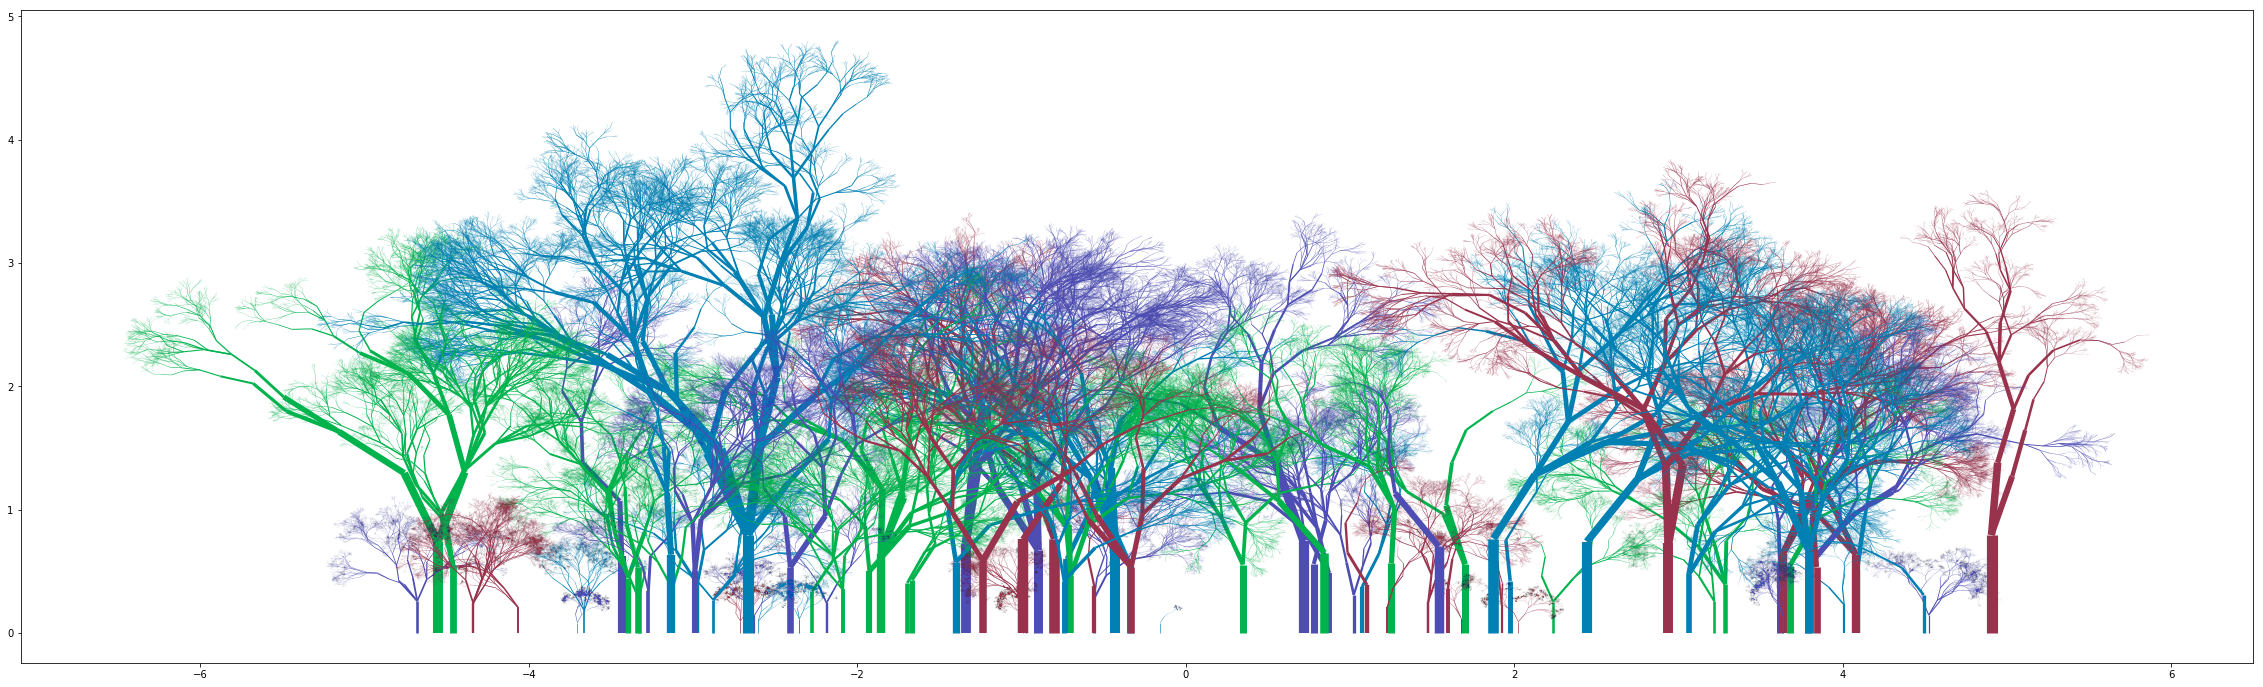

In [36]:
%%time
ct+=1
lc = mc.LineCollection(trees, colors=colors,linewidths=widths)
fig, ax = pl.subplots(figsize=(8*w,12))
ax.add_collection(lc)
ax.autoscale()
pl.savefig("D:/Personal/Projects/Recursive structures/Images/random forest "+str(ct)+".png")
# ax.margins(0.1)

In [ ]:
ct